# Linear classifiers demo: `fit`

CPSC 340: Machine Learning and Data Mining

The University of British Columbia

2017 Winter Term 2

Mike Gelbart

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from plot_classifier import plot_loss_diagram, plot_classifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

%autosave 0

Autosave disabled


### Loss function diagrams and `fit`

- Below is the 0-1 loss, which, when added over examples, give the number of classification errors. 
- This is intuitive but hard to minimize.
- Note that we're being clever with the fact that $y_i\in\{-1,+1\}$ when we write $y_iw^Tx_i$.

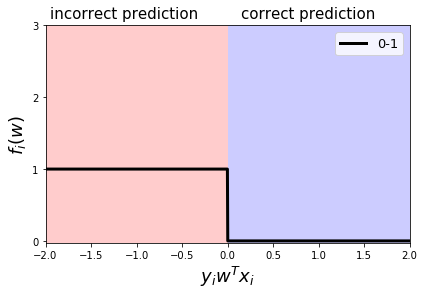

In [3]:
plot_loss_diagram()
grid = np.linspace(-2,2,1000)
plt.plot(grid, grid<0, color='black', linewidth=3, label="0-1")
plt.legend(loc="best", fontsize=13);

Below is the squared error loss:

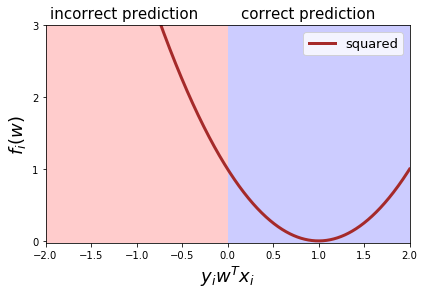

In [4]:
plot_loss_diagram()
grid = np.linspace(-2,2,1000)
plt.plot(grid, (grid-1)**2, color='brown', linewidth=3, label="squared")
plt.legend(loc="best", fontsize=13);

- Below are two convex approximations to the 0-1 loss which are used a lot in practice. 
  - Logistic loss: $\log(1+\exp(-y_iw^Tx_i))$
  - Hinge loss: $\max(0, 1-y_iw^Tx_i)$
- The subtle difference between them has important implications.

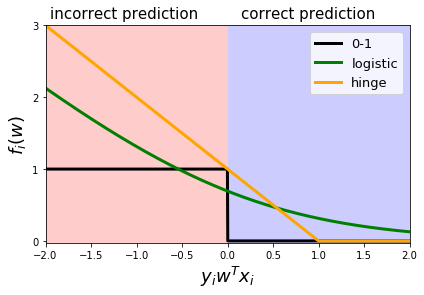

In [5]:
plot_loss_diagram()
plt.plot(grid, grid<0, color='black', linewidth=3, label="0-1")
plt.plot(grid, np.log(1+np.exp(-grid)), color='green', linewidth=3, label="logistic")
plt.plot(grid, np.maximum(0,1-grid), color='orange', linewidth=3, label="hinge")
plt.legend(loc="best", fontsize=13);

### Support vectors

- Support vectors occur when $y_iw^Tx_i < 1$.
- If something is not a support vector, then its loss is zero and it "doesn't contribute".

In [6]:
n = 20
X = np.random.randn(n,2)
y = np.random.choice((-1,+1),size=n)
X[y>0,0] -= 2
X[y>0,1] += 2

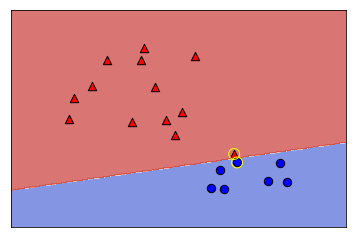

In [7]:
svm = SVC(kernel="linear", C=1e6)
svm.fit(X,y)

plt.figure()
plot_classifier(X,y,svm, ax=plt.gca())
plt.scatter(*svm.support_vectors_.T, marker="o", edgecolor="yellow", facecolor="none", s=120);

- The support vectors are shown in yellow.
- These are the example that "support" the boundary. Let's try removing one.

In [8]:
sv = svm.support_
not_sv = list(set(range(n)) - set(sv))

[[-1.88536123  8.58436944]]
[[-1.88536138  8.58437015]]


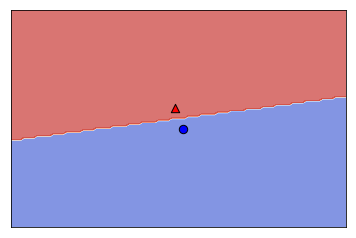

In [9]:
# remove all non-support vectors
X3 = np.delete(X,not_sv,0)
y3 = np.delete(y,not_sv,0)

svm3 = SVC(kernel="linear", C=1e6)
svm3.fit(X3,y3)

plot_classifier(X3,y3,svm3, ax=plt.gca())
# plt.scatter(*svm3.support_vectors_.T, marker="o", edgecolor="yellow", facecolor="none", s=120);
print(svm.coef_)
print(svm3.coef_)

[[-1.88536123  8.58436944]]
[[-0.97555171  5.30985636]]


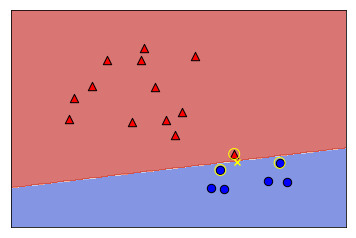

In [10]:
# remove a support vector
X2 = np.delete(X,sv[0],0)
y2 = np.delete(y,sv[0],0)

svm2 = SVC(kernel="linear", C=1e6)
svm2.fit(X2,y2)

plt.figure()
plot_classifier(X2,y2,svm2, ax=plt.gca())
plt.scatter(*svm2.support_vectors_.T, marker="o", edgecolor="yellow", facecolor="none", s=120);
plt.scatter(svm.support_vectors_[0,0], svm.support_vectors_[0,1], marker="x", c="yellow")
print(svm.coef_)
print(svm2.coef_)

--------

The rest is for fun, if we have time...

--------

### Max margin

In [11]:
# this data set should be linearly separable
X = np.random.randn(n,2)
y = np.random.choice((-1,+1),size=n)
X[y>0] += 5

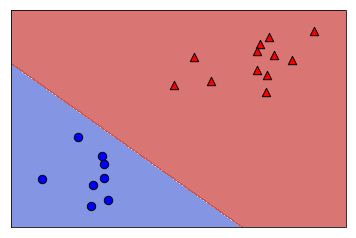

In [12]:
lr = LogisticRegression()
lr.fit(X,y)
plot_classifier(X,y,lr);

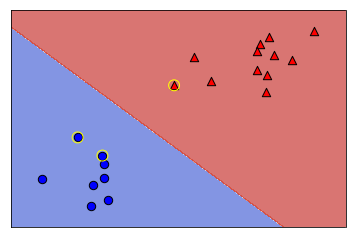

In [13]:
svm = SVC(kernel="linear", C=1)
svm.fit(X,y)
plot_classifier(X, y, svm);
plt.scatter(*svm.support_vectors_.T, marker="o", edgecolor="yellow", facecolor="none", s=120);

- Above: it looks like SVM maximizes the margin whereas logistic regression doesn't.
- Not sure how meaningful this
- Also, logistic regression will stop making errors for sufficiently large `C`.
- (If you want, you could also think of KNN with $k=1$ as maximizing its margin, since the boundary will always be half way between examples of different labels)

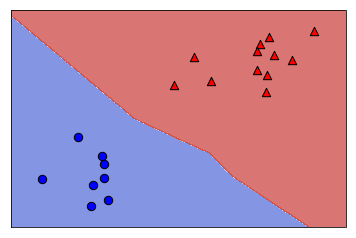

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
plot_classifier(X, y, knn);

### Probabilities

- It is not particularly natural to get probabilities out of SVMs, although one could devise ways of doing so.

### Regularization

- Larger $\lambda$ makes the coefficients smaller as usual
- I don't have an elegent intuitive iterpretation 
- But let's revisit this next week when we get to kernels

### Preview of upcoming lectures

- Friday: multi-class classification with linear classifiers
- Monday: kernel methods

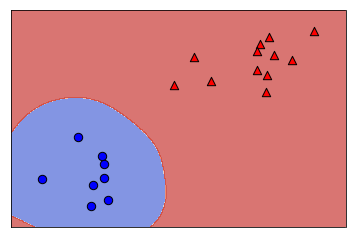

In [15]:
svm = SVC() # RBF kernel by default
svm.fit(X,y)

plot_classifier(X,y,svm);